#### Day-9>> Numpy Operations 

#### Import && settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

np.random.seed(0)
out_dir = Path("")
out_dir.mkdir(parents=True, exist_ok=True)


#### Helper: show and save image

In [2]:
def show_image(img, title=None):
    plt.figure(figsize=(4,4))
    plt.imshow(np.clip(img, 0, 1))
    if title: plt.title(title)
    plt.axis('off')
    plt.show()

def save_image(img, filename, dpi=150):
    path = out_dir / filename
    plt.imsave(path, np.clip(img, 0, 1), dpi=dpi)
    return path


#### Create a fake RGB image (gradient + noise)

rgb shape: (128, 128, 3) min/max: 0.0 1.0


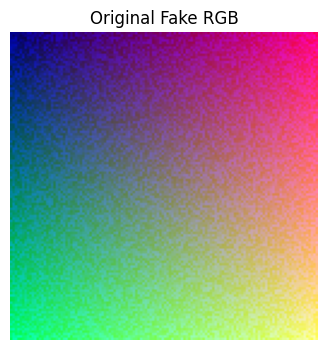

WindowsPath('rgb_before.png')

In [3]:
H, W = 128, 128
# horizontal gradient for R, vertical gradient for G, noise for B
x = np.linspace(0, 1, W)
y = np.linspace(0, 1, H)[:, None]
R = np.tile(x, (H,1))               # left→right
G = np.tile(y, (1,W))               # top→bottom
B = np.random.rand(H, W) * 0.4 + 0.3  # controlled noise
rgb = np.stack([R, G, B], axis=2)   # shape (H,W,3)
print("rgb shape:", rgb.shape, "min/max:", rgb.min(), rgb.max())
show_image(rgb, "Original Fake RGB")
save_image(rgb, "rgb_before.png")


#### Brightness adjuster (factor) — vectorized

In [4]:
def adjust_brightness(img, factor, mode='scale'):
    """
    img: float array in [0,1]
    factor: float, positive. 
      - if mode=='scale': multiply pixel values by factor
      - if mode=='add': add factor (useful for small offsets)
    returns clipped image in [0,1]
    """
    if mode == 'scale':
        out = img * factor
    elif mode == 'add':
        out = img + factor
    else:
        raise ValueError("mode must be 'scale' or 'add'")
    return np.clip(out, 0.0, 1.0)


#### Apply brightness changes (two examples) and show results

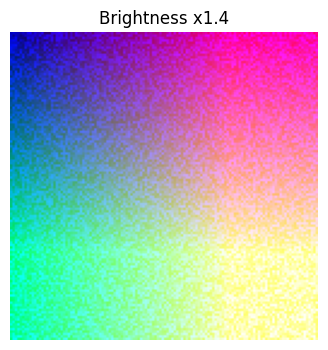

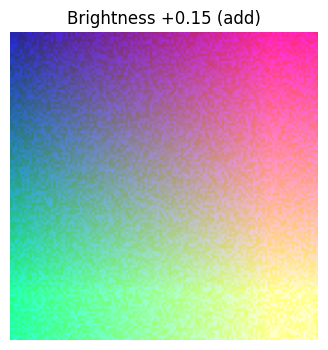

WindowsPath('rgb_after.png')

In [5]:
# Example 1: increase brightness by 1.4×
bright1 = adjust_brightness(rgb, 1.4, mode='scale')
show_image(bright1, "Brightness x1.4")
save_image(bright1, "rgb_after_bright1_4x.png")

# Example 2: add small constant (additive)
bright2 = adjust_brightness(rgb, 0.15, mode='add')
show_image(bright2, "Brightness +0.15 (add)")
save_image(bright2, "rgb_after_add_0_15.png")

# Persist a chosen final result as rgb_after.png (pick multiplicative as canonical)
save_image(bright1, "rgb_after.png")


#### Diagnostics: per-channel stats and pixel clipping check

In [6]:
def stats(name, img):
    print(name)
    for ch, c in enumerate(['R','G','B']):
        chv = img[:,:,ch]
        print(f"  {c}: min {chv.min():.4f}, max {chv.max():.4f}, mean {chv.mean():.4f}, std {chv.std():.4f}")
    print("total clipped values (after clip):", np.sum((img < 0) | (img > 1)))
    print()

stats("Original", rgb)
stats("Bright x1.4", bright1)
stats("Bright +0.15", bright2)


Original
  R: min 0.0000, max 1.0000, mean 0.5000, std 0.2909
  G: min 0.0000, max 1.0000, mean 0.5000, std 0.2909
  B: min 0.3000, max 0.7000, mean 0.4977, std 0.1158
total clipped values (after clip): 0

Bright x1.4
  R: min 0.0000, max 1.0000, mean 0.6417, std 0.3344
  G: min 0.0000, max 1.0000, mean 0.6417, std 0.3344
  B: min 0.4200, max 0.9800, mean 0.6968, std 0.1622
total clipped values (after clip): 0

Bright +0.15
  R: min 0.1500, max 1.0000, mean 0.6383, std 0.2740
  G: min 0.1500, max 1.0000, mean 0.6383, std 0.2740
  B: min 0.4500, max 0.8500, mean 0.6477, std 0.1158
total clipped values (after clip): 0



#### Save notebook artifacts list (for commit)

In [7]:
for p in sorted(out_dir.glob("rgb_*.png")):
    print(p.name, "-", p.stat().st_size, "bytes")


rgb_after.png - 25695 bytes
rgb_after_add_0_15.png - 23608 bytes
rgb_after_bright1_4x.png - 25695 bytes
rgb_before.png - 23746 bytes
